<a href="https://colab.research.google.com/github/Roberto-Ulises-Cruz-Olivares/EDPI/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integral de Fourier

A continuacion vamos a aproximar la siguiente funcion:

$$
f(v) =
\begin{cases}
1, & \text{si } |x| < 1 \\
0, & \text{si } |x| > 1
\end{cases}
$$


In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici


x, v, w = sp.symbols('x v w', real=True)

# Definimos la funcion f(x)
f_v = sp.Piecewise((1, sp.Abs(v) < 1), (0, True))




Formula general:

$$
f(x) = \int_{0}^{\infty} \left[ A(\omega) \cos(\omega x) + B(\omega) \sin(\omega x) \right] d\omega
$$

Calculando primero:
$$
A(\omega) = \frac{1}{\pi} \int_{-\infty}^{\infty} f(v) \cos(\omega v) \, dv
$$

In [8]:
# Calculo del coeficiente A(w)
A_w = (1 / sp.pi) * sp.integrate(f_v * sp.cos(w * v), (v, -sp.oo, sp.oo))
print(A_w)

Piecewise((2*sin(w)/w, Ne(w, 0)), (2, True))/pi


Ahora
$$
B(\omega) = \frac{1}{\pi} \int_{-\infty}^{\infty} f(v) \sin(\omega v) \, dv
$$

In [9]:
# Calculo del coeficiente B(w)
B_w = (1 / sp.pi) * sp.integrate(f_v * sp.sin(w * v), (v, -sp.oo, sp.oo))
print(B_w)

0


Mostramos A y B

In [10]:
print("A(w) =", A_w)
print("B(w) =", B_w)

A(w) = Piecewise((2*sin(w)/w, Ne(w, 0)), (2, True))/pi
B(w) = 0


Integral en general:

In [11]:
# f(x) general: usando la integral completa
f_general = sp.integrate(A_w * sp.cos(w * x) + B_w * sp.sin(w * x), (w, 0, sp.oo))
print("\nf(x) general =", f_general)


f(x) general = Integral(Piecewise((2*sin(w)*cos(w*x)/(pi*w), Ne(w, 0)), (2*cos(w*x)/pi, True)), (w, 0, oo))


# Identidad trigonometrica para resolver nuestra integral de fourier:
$$
f(x) = \int_{0}^{\infty} A(\omega) \cos(\omega x) \, d\omega
$$
ya que como A nos dio seno, usamos la identidad que transforma el seno por coseno en puros senos, la escribimos con una funcion especial de scipy

In [12]:
# Identidad trigonometrica
def Si(x_val):
    return sici(x_val)[0]

# Aproximaciones para a = 8, 16, 32

In [13]:
f_x_a8 = sp.integrate(A_w * sp.cos(w * x), (w, 0, 8))
f_x_a16 = sp.integrate(A_w * sp.cos(w * x), (w, 0, 16))
f_x_a32 = sp.integrate(A_w * sp.cos(w * x), (w, 0, 32))

# conversion a numericamente
f_lambdified_8 = sp.lambdify(x, f_x_a8, modules=[{'Si': Si}, 'numpy'])
f_lambdified_16 = sp.lambdify(x, f_x_a16, modules=[{'Si': Si}, 'numpy'])
f_lambdified_32 = sp.lambdify(x, f_x_a32, modules=[{'Si': Si}, 'numpy'])

# Grafica:

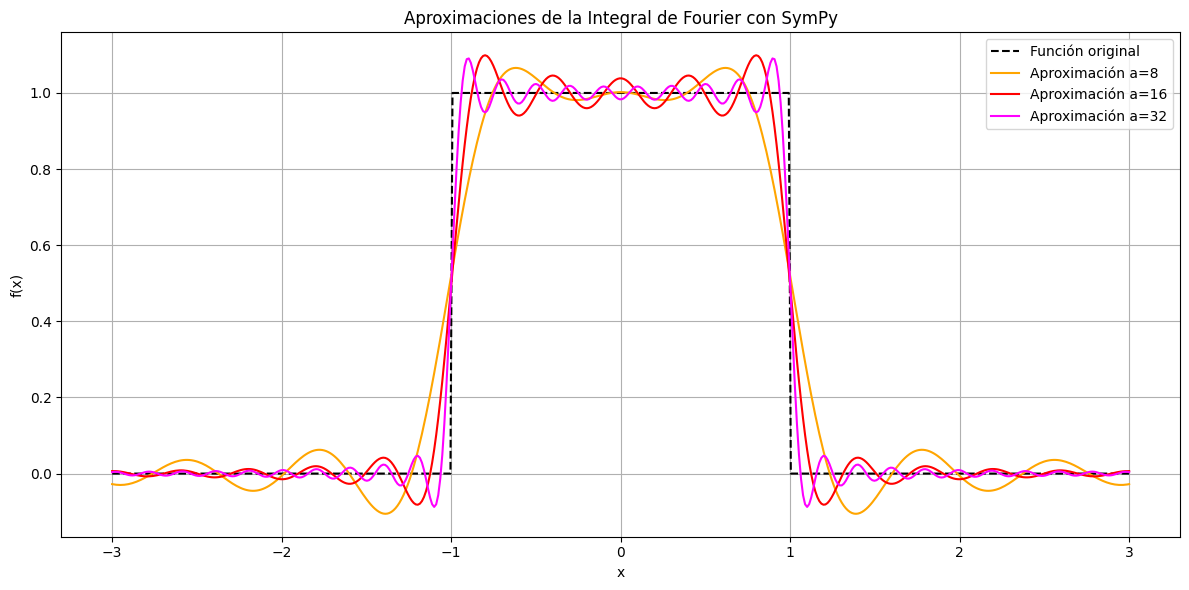

In [14]:
# Dominio
x_vals = np.linspace(-3, 3, 500)
f_original = np.where(np.abs(x_vals) < 1, 1, 0)

# Grafica
plt.figure(figsize=(12, 6))
plt.plot(x_vals, f_original, 'k--', label='Funcion original f(v)')
plt.plot(x_vals, f_lambdified_8(x_vals), color='orange', label='Aproximacion a=8')
plt.plot(x_vals, f_lambdified_16(x_vals), color='red', label='Aproximacion a=16')
plt.plot(x_vals, f_lambdified_32(x_vals), color='magenta', label='Aproximacion a=32')
plt.legend()
plt.grid(True)
plt.title('Aproximaciones de la Integral de Fourier de ejercicio en clase')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.tight_layout()
plt.show()